## Завдання:

Побудувати моделi наївної байесiвської класифiкацiї за припущень:
- Данi в кожному класi мають нормальний розподiл без коварiацiї мiж вимiрами
- Данi в кожному класi мають полiномiальний розподiл

&nbsp;

Початковi данi:

(a) from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60 , random_state=0)

rng = np.random.RandomState(13)

X_stretched = np.dot(X, rng.randn(2, 2))

(б) import numpy as np

np.random.seed(0)

X = np.random.randn(300, 2)

Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

## Виконання завдання

In [1249]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import metrics

In [1250]:
plt.style.use('seaborn-v0_8-notebook')

### Набір даних (а)

In [1251]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

Візуалізація даних

In [1252]:
np.unique(y_true)

array([0, 1, 2, 3])

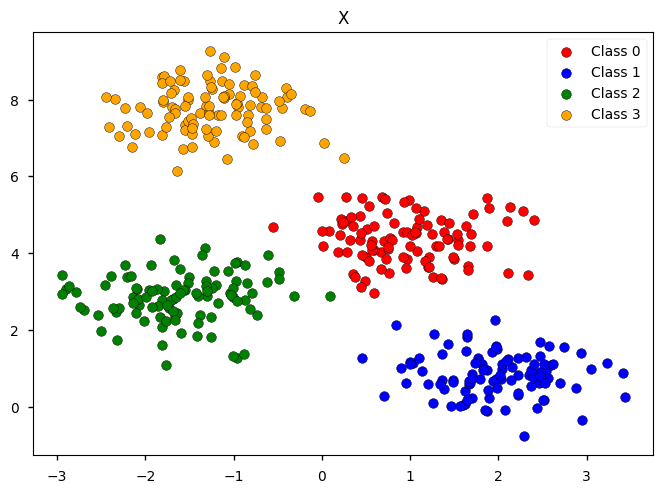

In [1253]:
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("X")
plt.show()

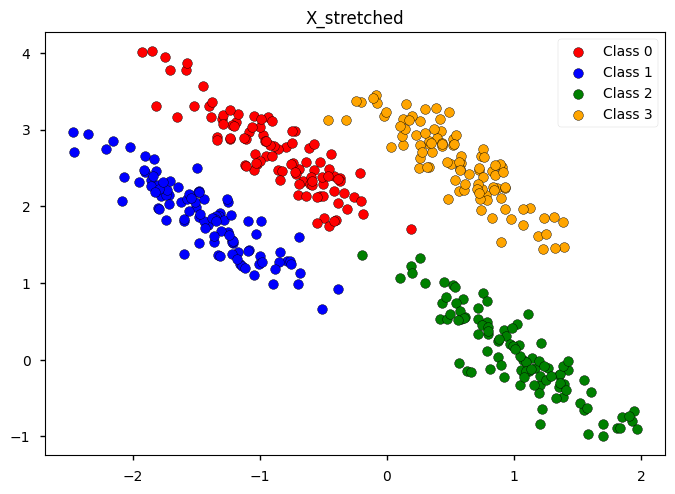

In [1254]:
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("X_stretched")
plt.show()

Розбиття даних на навчальний та тестовий набори

In [1255]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, y_true, test_size=0.2)
train_data_stretched, test_data_stretched, train_labels_stretched, test_labels_stretched = model_selection.train_test_split(X_stretched, y_true, test_size=0.2)

In [1256]:
train_data.shape

(320, 2)

In [1257]:
test_data.shape

(80, 2)

In [1258]:
train_labels.shape

(320,)

In [1259]:
test_labels.shape

(80,)

Побудова моделі 1. Припущення про те що дані в кожному класі мають нормальний розпоіл без коваріації між вимірами для даних Х

In [1260]:
model = naive_bayes.GaussianNB()
model.fit(train_data, train_labels)
model.predict(test_data)

array([1, 3, 0, 0, 3, 2, 2, 2, 2, 0, 3, 1, 3, 2, 3, 3, 2, 1, 3, 3, 0, 0,
       1, 2, 1, 1, 3, 0, 1, 3, 0, 2, 2, 0, 2, 0, 3, 2, 3, 2, 1, 1, 0, 3,
       3, 3, 2, 0, 1, 2, 1, 3, 3, 3, 0, 2, 0, 0, 2, 3, 1, 3, 2, 3, 0, 1,
       1, 0, 3, 1, 1, 0, 0, 2, 0, 2, 3, 0, 2, 1])

In [1261]:
test_labels

array([1, 3, 0, 0, 3, 2, 2, 2, 2, 0, 3, 1, 3, 2, 3, 3, 2, 1, 3, 3, 0, 0,
       1, 2, 1, 1, 3, 0, 1, 3, 0, 2, 2, 0, 2, 0, 3, 2, 3, 2, 1, 1, 0, 3,
       3, 3, 2, 0, 1, 2, 1, 3, 3, 3, 0, 2, 0, 0, 2, 3, 1, 3, 2, 3, 0, 1,
       1, 0, 3, 1, 1, 0, 0, 2, 0, 2, 3, 0, 2, 1])

In [1262]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 80 прикладів з 80


Перенавчання відсутнє

Апостеріорні імовірності:

In [1263]:
model.predict_proba(test_data)

array([[7.01649229e-14, 1.00000000e+00, 1.16514275e-11, 3.49235415e-42],
       [1.55113845e-07, 2.60576062e-31, 6.70880668e-09, 9.99999838e-01],
       [9.99940783e-01, 8.07321179e-16, 4.15370901e-06, 5.50630537e-05],
       [9.64888971e-01, 3.55433696e-06, 3.51074744e-02, 2.35608125e-12],
       [2.22240989e-07, 1.20094268e-32, 8.13191012e-12, 9.99999778e-01],
       [8.15944913e-08, 3.40141205e-16, 9.99999918e-01, 8.52138815e-12],
       [2.45345671e-07, 7.34193153e-07, 9.99999020e-01, 4.47621866e-20],
       [2.90856650e-07, 3.85385604e-10, 9.99999709e-01, 8.42976093e-17],
       [2.32418957e-03, 2.80625687e-13, 9.97675770e-01, 4.02369138e-08],
       [9.99998978e-01, 1.14724546e-14, 3.38830801e-07, 6.82712734e-07],
       [3.27124447e-10, 3.24909528e-37, 1.27733164e-12, 1.00000000e+00],
       [1.12014967e-10, 9.99999985e-01, 1.52221416e-08, 1.10685148e-35],
       [4.25719590e-10, 1.79107260e-39, 4.38233842e-17, 1.00000000e+00],
       [4.49499809e-11, 8.62406338e-13, 1.00000000e

Границі рішень:

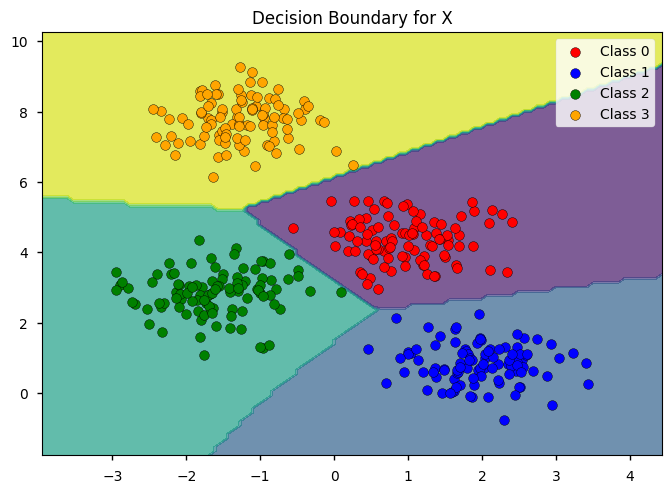

In [1264]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X")
plt.show()

Розрахунок критеріїв якості:

In [1265]:
metrics.confusion_matrix(test_labels, model.predict(test_data))

array([[20,  0,  0,  0],
       [ 0, 17,  0,  0],
       [ 0,  0, 20,  0],
       [ 0,  0,  0, 23]])

In [1266]:
metrics.precision_score(test_labels, model.predict(test_data), average=None)

array([1., 1., 1., 1.])

In [1267]:
metrics.recall_score(test_labels, model.predict(test_data), average=None)

array([1., 1., 1., 1.])

In [1268]:
metrics.f1_score(test_labels, model.predict(test_data), average=None)

array([1., 1., 1., 1.])

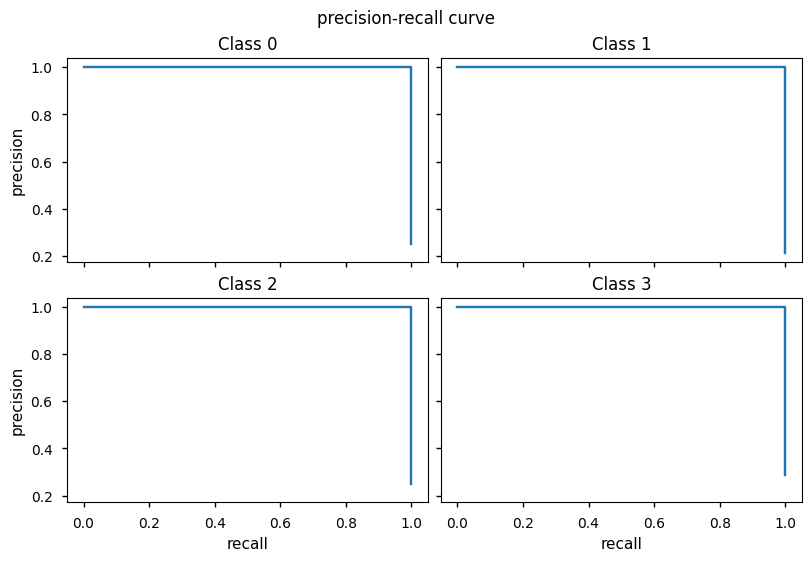

In [1269]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 0, model.predict_proba(test_data)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 1, model.predict_proba(test_data)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 2, model.predict_proba(test_data)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 3, model.predict_proba(test_data)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

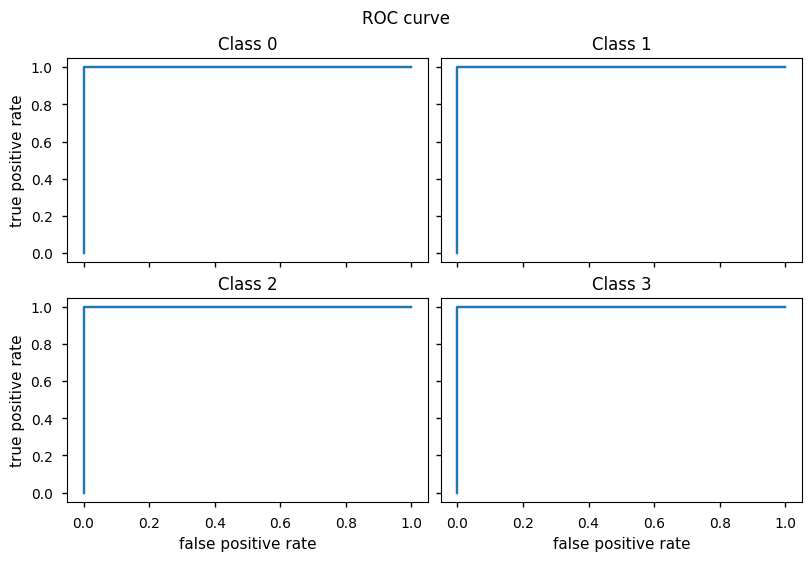

In [1270]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 0, model.predict_proba(test_data)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 1, model.predict_proba(test_data)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 2, model.predict_proba(test_data)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 3, model.predict_proba(test_data)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [1271]:
metrics.roc_auc_score(test_labels, model.predict_proba(test_data), multi_class='ovr', average=None)

array([1., 1., 1., 1.])

Решітчастий пошук для підбору гіперпараметрів:

In [1272]:
parameters = {'var_smoothing': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data, train_labels)
grid_search.best_estimator_

GaussianNB(var_smoothing=1)

Навчання моделі на підмножині навчальних даних

In [1273]:
model.fit(train_data[:20], train_labels[:20])
model.predict(test_data)

array([1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 0,
       1, 2, 1, 1, 3, 1, 1, 3, 0, 2, 2, 0, 2, 0, 3, 2, 3, 2, 1, 1, 0, 3,
       3, 3, 2, 0, 1, 2, 1, 3, 3, 3, 0, 2, 2, 0, 2, 3, 1, 3, 2, 3, 0, 1,
       1, 2, 3, 1, 1, 2, 0, 2, 0, 2, 3, 2, 2, 1])

In [1274]:
test_labels

array([1, 3, 0, 0, 3, 2, 2, 2, 2, 0, 3, 1, 3, 2, 3, 3, 2, 1, 3, 3, 0, 0,
       1, 2, 1, 1, 3, 0, 1, 3, 0, 2, 2, 0, 2, 0, 3, 2, 3, 2, 1, 1, 0, 3,
       3, 3, 2, 0, 1, 2, 1, 3, 3, 3, 0, 2, 0, 0, 2, 3, 1, 3, 2, 3, 0, 1,
       1, 0, 3, 1, 1, 0, 0, 2, 0, 2, 3, 0, 2, 1])

In [1275]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 71 прикладів з 80


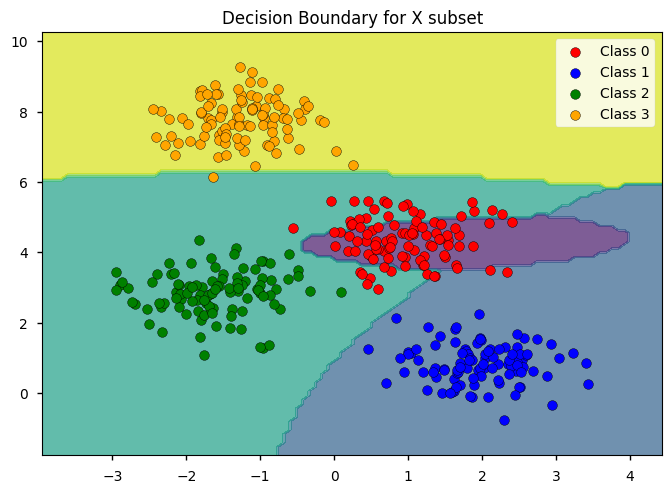

In [1276]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X subset")
plt.show()

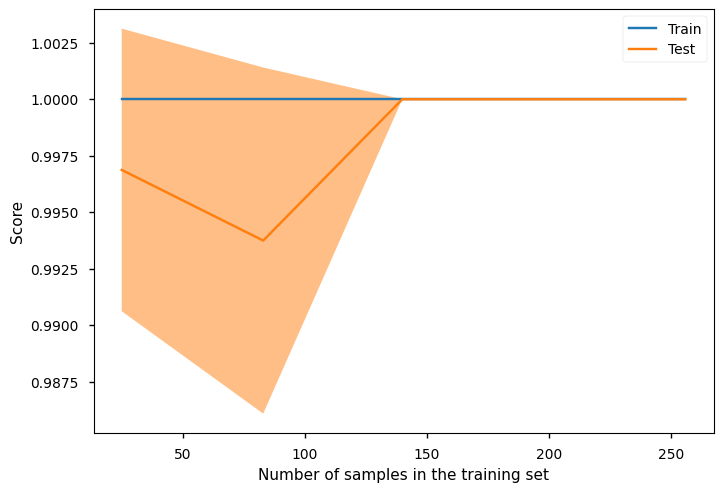

In [1277]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data, train_labels)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є досить гарною моделлю. 

Побудова моделі 2. Припущення про те що дані в кожному класі мають нормальний розпоіл без коваріації між вимірами для даних Х_stretched

In [1278]:
model = naive_bayes.GaussianNB()
model.fit(train_data_stretched, train_labels_stretched)
model.predict(test_data_stretched)

array([2, 0, 0, 0, 0, 3, 0, 1, 0, 2, 2, 0, 3, 1, 3, 0, 1, 2, 3, 3, 3, 2,
       3, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 3, 3, 2, 2, 3, 2, 2,
       1, 0, 1, 3, 1, 0, 1, 0, 3, 0, 3, 2, 1, 2, 3, 2, 3, 1, 2, 2, 0, 3,
       0, 0, 3, 1, 2, 1, 0, 3, 1, 3, 0, 2, 3, 0])

In [1279]:
test_labels_stretched

array([2, 0, 0, 0, 0, 3, 0, 1, 0, 2, 2, 0, 3, 1, 2, 0, 1, 2, 3, 3, 3, 2,
       3, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 3, 3, 2, 2, 3, 2, 2,
       1, 0, 1, 3, 1, 0, 1, 0, 3, 0, 2, 2, 1, 2, 3, 2, 3, 1, 2, 2, 0, 3,
       0, 0, 3, 1, 2, 1, 0, 3, 1, 3, 0, 2, 3, 0])

In [1280]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 78 прикладів з 80


Перенавчання відсутнє

Апостеріорні імовірності:

In [1281]:
model.predict_proba(train_data_stretched)

array([[7.59877373e-01, 1.94433454e-01, 3.26362419e-06, 4.56859089e-02],
       [3.61904309e-03, 2.25706077e-06, 5.32160627e-05, 9.96325484e-01],
       [9.77533528e-01, 2.09971373e-02, 1.24567102e-11, 1.46933487e-03],
       ...,
       [9.62447923e-02, 9.03752745e-01, 2.15531526e-10, 2.46280112e-06],
       [1.04030516e-01, 8.95969246e-01, 1.77860089e-12, 2.38042605e-07],
       [5.05999659e-02, 9.49369090e-01, 1.76577778e-06, 2.91779950e-05]])

Границі рішень:

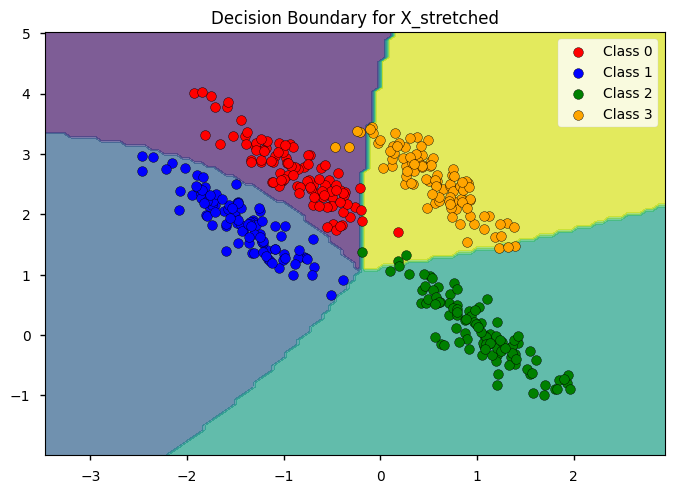

In [1282]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched")
plt.show()

Розрахунок критеріїв якості:

In [1283]:
metrics.confusion_matrix(test_labels_stretched, model.predict(test_data_stretched))

array([[25,  0,  0,  0],
       [ 0, 17,  0,  0],
       [ 0,  0, 18,  2],
       [ 0,  0,  0, 18]])

In [1284]:
metrics.precision_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([1. , 1. , 1. , 0.9])

In [1285]:
metrics.recall_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([1. , 1. , 0.9, 1. ])

In [1286]:
metrics.f1_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([1.        , 1.        , 0.94736842, 0.94736842])

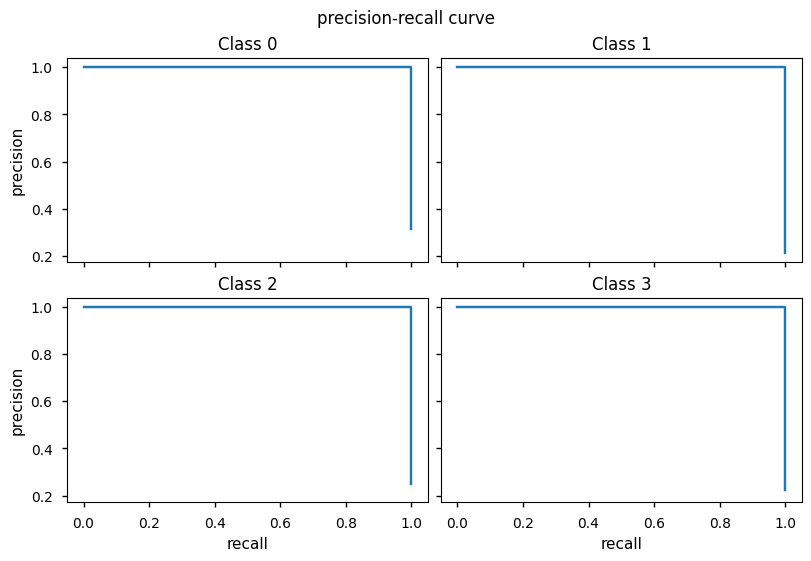

In [1287]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

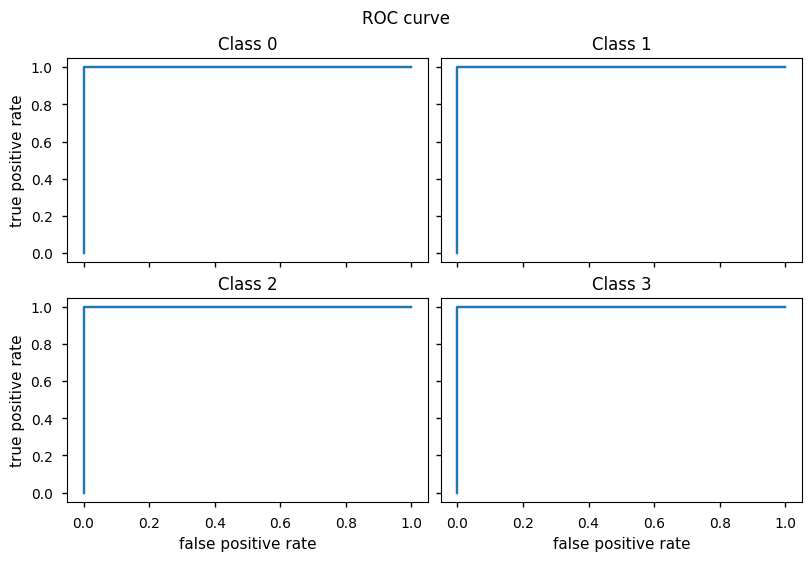

In [1288]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [1289]:
metrics.roc_auc_score(test_labels_stretched, model.predict_proba(test_data_stretched), multi_class='ovr', average=None)

array([1., 1., 1., 1.])

Решітчастий пошук для підбору гіперпараметрів:

In [1290]:
parameters = {'var_smoothing': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_stretched, train_labels_stretched)
grid_search.best_estimator_

GaussianNB(var_smoothing=0.1)

Навчання моделі на підмножині навчальних даних

In [1291]:
model.fit(train_data_stretched[:20], train_labels_stretched[:20])
model.predict(test_data_stretched)

array([2, 0, 0, 0, 0, 3, 0, 1, 0, 2, 2, 0, 3, 1, 3, 0, 1, 3, 3, 3, 3, 2,
       3, 3, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 3, 3, 2, 2, 3, 2, 2,
       1, 0, 1, 3, 1, 0, 1, 0, 3, 0, 3, 2, 1, 2, 3, 2, 3, 1, 2, 2, 0, 3,
       0, 0, 3, 1, 2, 1, 0, 3, 1, 3, 0, 2, 3, 0])

In [1292]:
test_labels_stretched

array([2, 0, 0, 0, 0, 3, 0, 1, 0, 2, 2, 0, 3, 1, 2, 0, 1, 2, 3, 3, 3, 2,
       3, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 3, 3, 2, 2, 3, 2, 2,
       1, 0, 1, 3, 1, 0, 1, 0, 3, 0, 2, 2, 1, 2, 3, 2, 3, 1, 2, 2, 0, 3,
       0, 0, 3, 1, 2, 1, 0, 3, 1, 3, 0, 2, 3, 0])

In [1293]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 74 прикладів з 80


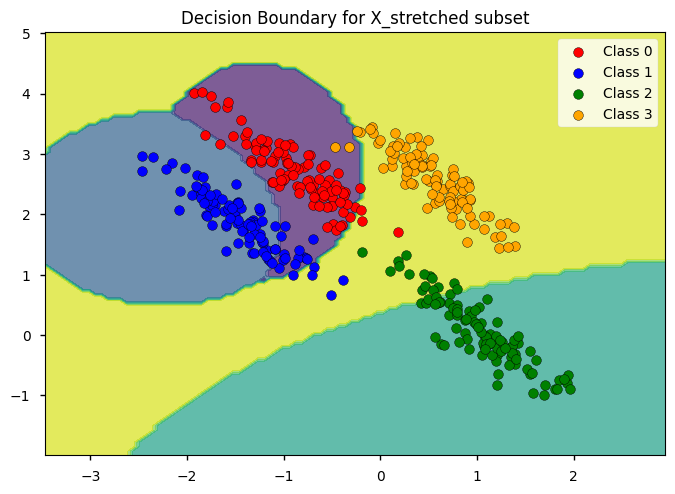

In [1294]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched subset")
plt.show()

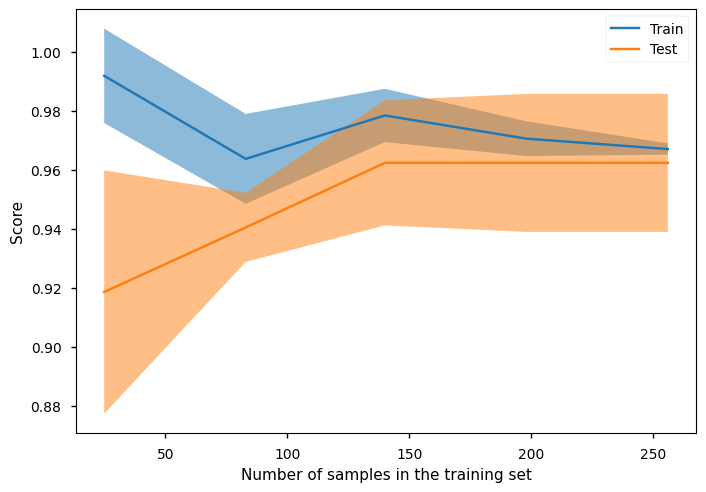

In [1295]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_stretched, train_labels_stretched)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є досить гарною моделлю. 

Побудова моделі 3. Припущення про те що дані в кожному класі мають поліноміальний розпоіл для даних Х

In [1296]:
X_pos = X + 5
train_data_pos, test_data_pos, train_labels_pos, test_labels_pos = model_selection.train_test_split(X_pos, y_true, test_size=0.2)

In [1297]:
model = naive_bayes.MultinomialNB()
model.fit(train_data_pos, train_labels_pos)
model.predict(test_data_pos)

array([1, 2, 1, 0, 1, 0, 1, 3, 2, 0, 0, 0, 3, 1, 2, 0, 2, 1, 0, 3, 1, 2,
       0, 0, 1, 0, 0, 3, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 3, 3, 3, 3,
       3, 0, 3, 2, 3, 0, 0, 3, 3, 2, 3, 1, 1, 0, 0, 3, 1, 3, 2, 2, 2, 1,
       2, 1, 0, 3, 2, 3, 1, 3, 0, 1, 1, 3, 2, 0])

In [1298]:
test_labels_pos

array([1, 2, 1, 0, 1, 0, 1, 3, 2, 0, 1, 0, 3, 1, 2, 0, 2, 1, 0, 3, 1, 2,
       0, 0, 1, 0, 0, 3, 0, 1, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 3, 3, 3, 3,
       3, 0, 2, 2, 3, 0, 0, 3, 3, 2, 3, 1, 1, 0, 2, 3, 1, 3, 2, 2, 2, 1,
       2, 1, 0, 3, 2, 3, 1, 3, 2, 1, 1, 3, 2, 2])

In [1299]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos == model.predict(test_data_pos))} прикладів з {len(test_labels_pos)}')

Правильно класифіковано 74 прикладів з 80


Імовірно присутнє перенавчання моделі

Апостеріорні імовірності:

In [1300]:
model.predict_proba(test_data_pos)

array([[0.27315534, 0.62352567, 0.08293352, 0.02038547],
       [0.31527325, 0.11019081, 0.32652498, 0.24801096],
       [0.32434181, 0.51819817, 0.121624  , 0.03583602],
       [0.40285773, 0.21837475, 0.26191082, 0.1168567 ],
       [0.29949699, 0.57070937, 0.10198847, 0.02780518],
       [0.4085341 , 0.27176242, 0.23016566, 0.08953782],
       [0.29135386, 0.58006481, 0.10031149, 0.02826983],
       [0.15825731, 0.01152258, 0.35535075, 0.47486936],
       [0.29195802, 0.08669008, 0.33740692, 0.28394498],
       [0.37562068, 0.17141315, 0.29258559, 0.16038058],
       [0.3629117 , 0.35318075, 0.19852224, 0.08538532],
       [0.39662052, 0.24725338, 0.24708147, 0.10904462],
       [0.14946312, 0.01107538, 0.34736295, 0.49209855],
       [0.27148653, 0.62039773, 0.0857442 , 0.02237155],
       [0.31557289, 0.1126482 , 0.3250109 , 0.24676801],
       [0.35877289, 0.10993904, 0.33070072, 0.20058735],
       [0.28043065, 0.07890523, 0.33981881, 0.30084531],
       [0.28794351, 0.58609661,

Границі рішень:

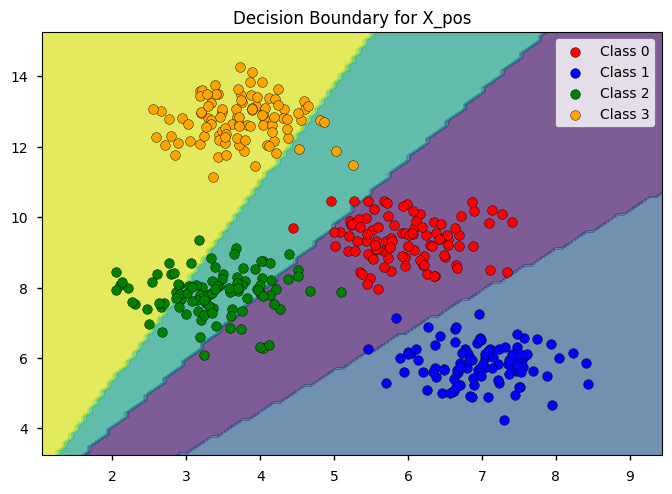

In [1301]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos, response_method='predict', alpha=0.7)
plt.scatter(X_pos[:, 0][y_true == 0], X_pos[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_pos[:, 0][y_true == 1], X_pos[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_pos[:, 0][y_true == 2], X_pos[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_pos[:, 0][y_true == 3], X_pos[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_pos")
plt.show()

Розрахунок критеріїв якості:

In [1302]:
metrics.confusion_matrix(test_labels_pos, model.predict(test_data_pos))

array([[19,  0,  0,  0],
       [ 1, 20,  0,  0],
       [ 4,  0, 16,  1],
       [ 0,  0,  0, 19]])

In [1303]:
metrics.precision_score(test_labels_pos, model.predict(test_data_pos), average=None)

array([0.79166667, 1.        , 1.        , 0.95      ])

In [1304]:
metrics.recall_score(test_labels_pos, model.predict(test_data_pos), average=None)

array([1.        , 0.95238095, 0.76190476, 1.        ])

In [1305]:
metrics.f1_score(test_labels_pos, model.predict(test_data_pos), average=None)

array([0.88372093, 0.97560976, 0.86486486, 0.97435897])

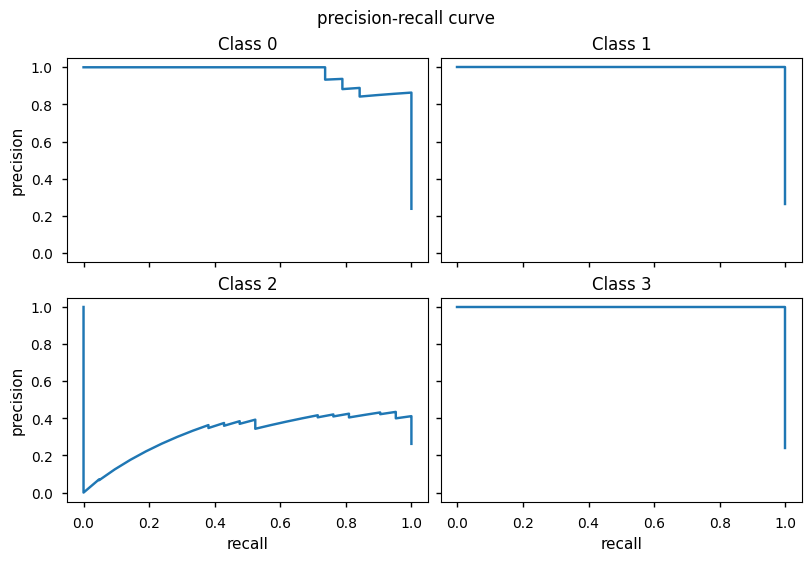

In [1306]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos == 0, model.predict_proba(test_data_pos)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos == 1, model.predict_proba(test_data_pos)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos == 2, model.predict_proba(test_data_pos)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos == 3, model.predict_proba(test_data_pos)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

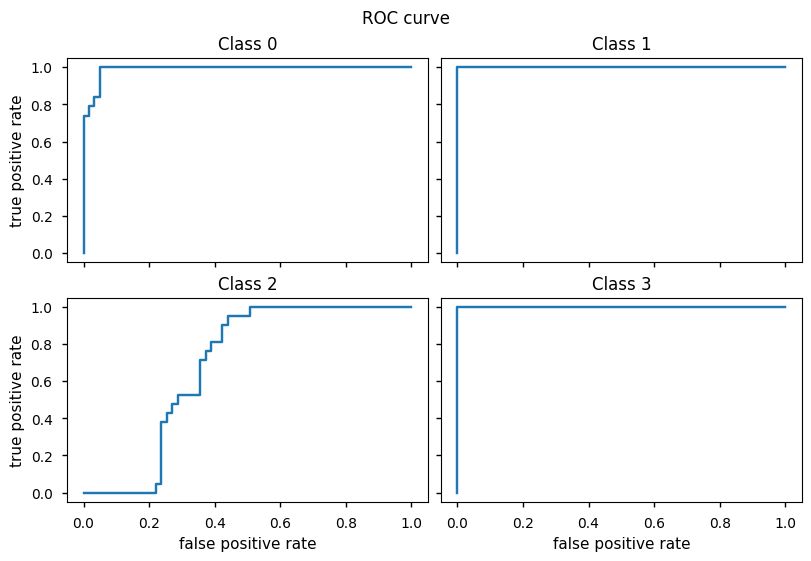

In [1307]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos == 0, model.predict_proba(test_data_pos)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos == 1, model.predict_proba(test_data_pos)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos == 2, model.predict_proba(test_data_pos)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos == 3, model.predict_proba(test_data_pos)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [1308]:
metrics.roc_auc_score(test_labels_pos, model.predict_proba(test_data_pos), multi_class='ovr', average=None)

array([0.98964625, 1.        , 0.68200161, 1.        ])

Решітчастий пошук для підбору гіперпараметрів:

In [1309]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_pos, train_labels_pos)
grid_search.best_estimator_

MultinomialNB(alpha=1)

Навчання моделі на підмножині навчальних даних

In [1310]:
model.fit(train_data_pos[:20], train_labels_pos[:20])
model.predict(test_data_pos)

array([1, 2, 1, 0, 1, 0, 1, 3, 2, 0, 1, 0, 3, 1, 2, 0, 2, 1, 0, 2, 1, 2,
       0, 0, 1, 0, 0, 3, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 3, 2, 2, 2,
       2, 0, 2, 2, 3, 0, 0, 3, 3, 2, 3, 1, 1, 0, 0, 3, 1, 3, 2, 2, 2, 1,
       2, 1, 0, 3, 2, 3, 1, 2, 2, 1, 1, 2, 2, 0])

In [1311]:
test_labels_pos

array([1, 2, 1, 0, 1, 0, 1, 3, 2, 0, 1, 0, 3, 1, 2, 0, 2, 1, 0, 3, 1, 2,
       0, 0, 1, 0, 0, 3, 0, 1, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 3, 3, 3, 3,
       3, 0, 2, 2, 3, 0, 0, 3, 3, 2, 3, 1, 1, 0, 2, 3, 1, 3, 2, 2, 2, 1,
       2, 1, 0, 3, 2, 3, 1, 3, 2, 1, 1, 3, 2, 2])

In [1312]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos == model.predict(test_data_pos))} прикладів з {len(test_labels_pos)}')

Правильно класифіковано 70 прикладів з 80


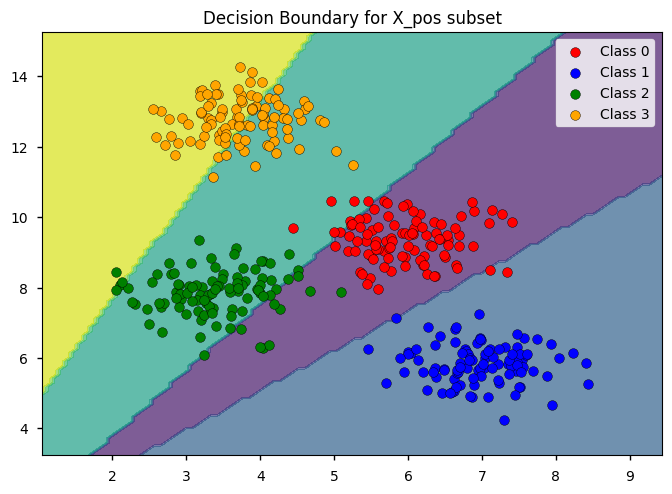

In [1313]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos, response_method='predict', alpha=0.7)
plt.scatter(X_pos[:, 0][y_true == 0], X_pos[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_pos[:, 0][y_true == 1], X_pos[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_pos[:, 0][y_true == 2], X_pos[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_pos[:, 0][y_true == 3], X_pos[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_pos subset")
plt.show()

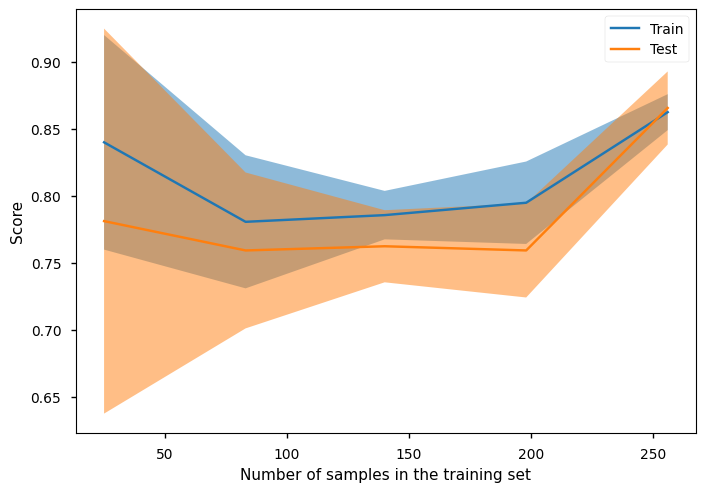

In [1314]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_pos, train_labels_pos)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині не є гарною та не вирішує добре поставлену задачу класифікації.

Побудова моделі 4. Припущення про те що дані в кожному класі мають поліноміальний розпоіл для даних Х_stretched

In [1315]:
X_pos_stretched = X_stretched + 5
train_data_pos_stretched, test_data_pos_stretched, train_labels_pos_stretched, test_labels_pos_stretched = model_selection.train_test_split(X_pos_stretched, y_true, test_size=0.2)

In [1316]:
model = naive_bayes.MultinomialNB()
model.fit(train_data_pos_stretched, train_labels_pos_stretched)
model.predict(test_data_pos_stretched)

array([1, 3, 3, 2, 1, 2, 3, 1, 2, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 3,
       1, 1, 2, 1, 2, 3, 1, 3, 3, 1, 3, 1, 1, 2, 3, 1, 1, 3, 3, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 3, 3, 3, 3, 3, 2, 1, 2, 2, 3, 1, 2, 3, 1, 3, 3,
       1, 1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 2, 2, 1])

In [1317]:
test_labels_pos_stretched

array([0, 3, 1, 2, 1, 2, 3, 1, 2, 0, 2, 0, 3, 1, 1, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 2, 0, 2, 3, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2, 1, 3,
       3, 1, 2, 0, 1, 1, 3, 1, 3, 0, 3, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 3,
       1, 0, 3, 0, 2, 2, 0, 1, 3, 2, 0, 2, 2, 1])

In [1318]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos_stretched == model.predict(test_data_pos_stretched))} прикладів з {len(test_labels_pos_stretched)}')

Правильно класифіковано 50 прикладів з 80


Імовірно присутнє перенавчання моделі

Апостеріорні імовірності:

In [1319]:
model.predict_proba(test_data_pos_stretched)

array([[0.29830896, 0.32470381, 0.10470412, 0.27228311],
       [0.2225394 , 0.2254408 , 0.23604308, 0.31597672],
       [0.26687326, 0.2835157 , 0.15946363, 0.29014742],
       [0.18464286, 0.18270158, 0.32286559, 0.30978997],
       [0.27564044, 0.29519691, 0.14433428, 0.28482838],
       [0.1810215 , 0.17858491, 0.33110213, 0.30929146],
       [0.25150891, 0.26067911, 0.17969783, 0.30811416],
       [0.30698803, 0.33940455, 0.0945205 , 0.25908692],
       [0.15286195, 0.14766049, 0.40047995, 0.29899761],
       [0.29297015, 0.31746275, 0.11339188, 0.27617522],
       [0.14521283, 0.13948525, 0.42061491, 0.29468701],
       [0.29059137, 0.31464774, 0.11795319, 0.2768077 ],
       [0.25686955, 0.2676749 , 0.17056257, 0.30489298],
       [0.28367763, 0.30594711, 0.13057962, 0.27979564],
       [0.30939187, 0.34313036, 0.09115787, 0.2563199 ],
       [0.18908621, 0.18784381, 0.31314787, 0.30992211],
       [0.14596256, 0.13997635, 0.41675939, 0.2973017 ],
       [0.27877325, 0.29945912,

Границі рішень:

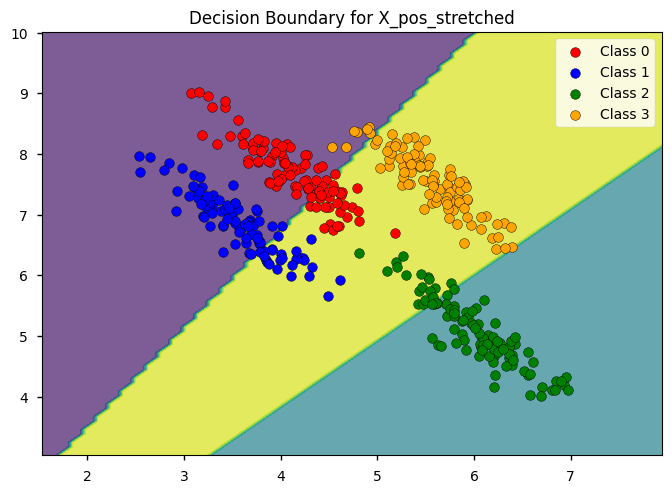

In [1320]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_pos_stretched[:, 0][y_true == 0], X_pos_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_pos_stretched[:, 0][y_true == 1], X_pos_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_pos_stretched[:, 0][y_true == 2], X_pos_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_pos_stretched[:, 0][y_true == 3], X_pos_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_pos_stretched")
plt.show()

Розрахунок критеріїв якості:

In [1321]:
metrics.confusion_matrix(test_labels_pos_stretched, model.predict(test_data_pos_stretched))

array([[ 0, 18,  0,  6],
       [ 0, 13,  0,  5],
       [ 0,  0, 22,  1],
       [ 0,  0,  0, 15]])

In [1322]:
metrics.precision_score(test_labels_pos_stretched, model.predict(test_data_pos_stretched), average=None)

/home/ilyahl/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.41935484, 1.        , 0.55555556])

In [1323]:
metrics.recall_score(test_labels_pos_stretched, model.predict(test_data_pos_stretched), average=None)

array([0.        , 0.72222222, 0.95652174, 1.        ])

In [1324]:
metrics.f1_score(test_labels_pos_stretched, model.predict(test_data_pos_stretched), average=None)

array([0.        , 0.53061224, 0.97777778, 0.71428571])

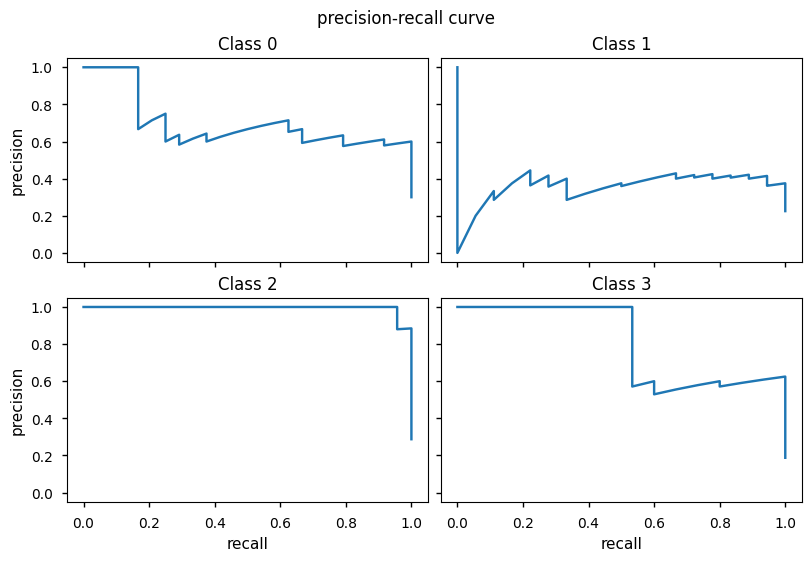

In [1325]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos_stretched == 0, model.predict_proba(test_data_pos_stretched)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos_stretched == 1, model.predict_proba(test_data_pos_stretched)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos_stretched == 2, model.predict_proba(test_data_pos_stretched)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_pos_stretched == 3, model.predict_proba(test_data_pos_stretched)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

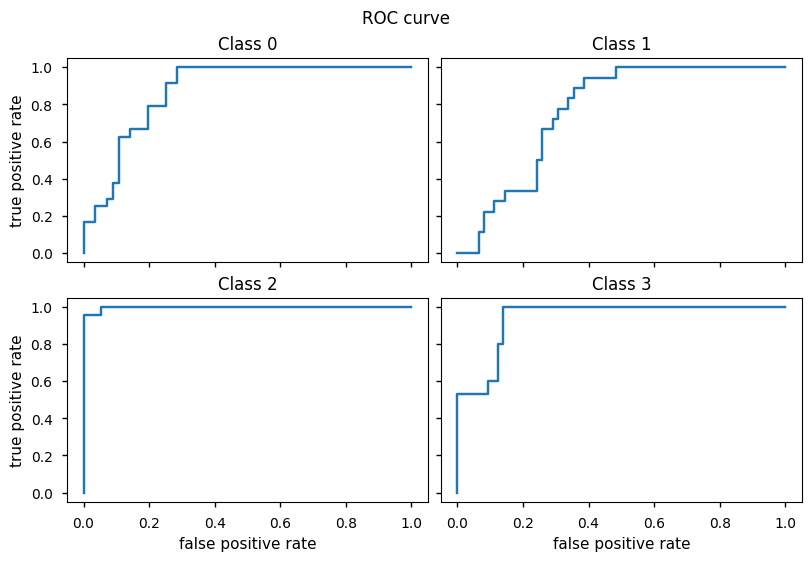

In [1326]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos_stretched == 0, model.predict_proba(test_data_pos_stretched)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos_stretched == 1, model.predict_proba(test_data_pos_stretched)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos_stretched == 2, model.predict_proba(test_data_pos_stretched)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_pos_stretched == 3, model.predict_proba(test_data_pos_stretched)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [1327]:
metrics.roc_auc_score(test_labels_pos_stretched, model.predict_proba(test_data_pos_stretched), multi_class='ovr', average=None)

array([0.87425595, 0.76612903, 0.99771167, 0.94153846])

Решітчастий пошук для підбору гіперпараметрів:

In [1328]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_pos_stretched, train_labels_pos_stretched)
grid_search.best_estimator_

MultinomialNB(alpha=1)

Навчання моделі на підмножині навчальних даних

In [1329]:
model.fit(train_data_pos_stretched[:20], train_labels_pos_stretched[:20])
model.predict(test_data_pos_stretched)

array([1, 3, 0, 2, 1, 2, 3, 1, 2, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 3, 0, 0, 0, 1, 0, 1, 0, 2, 3, 1, 1, 3, 3, 2, 1, 3,
       3, 1, 2, 1, 1, 0, 0, 3, 3, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 3,
       0, 1, 3, 1, 2, 2, 1, 0, 3, 2, 1, 2, 2, 0])

In [1330]:
test_labels_pos_stretched

array([0, 3, 1, 2, 1, 2, 3, 1, 2, 0, 2, 0, 3, 1, 1, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 2, 0, 2, 3, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2, 1, 3,
       3, 1, 2, 0, 1, 1, 3, 1, 3, 0, 3, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 3,
       1, 0, 3, 0, 2, 2, 0, 1, 3, 2, 0, 2, 2, 1])

In [1331]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos_stretched == model.predict(test_data_pos_stretched))} прикладів з {len(test_labels_pos_stretched)}')

Правильно класифіковано 52 прикладів з 80


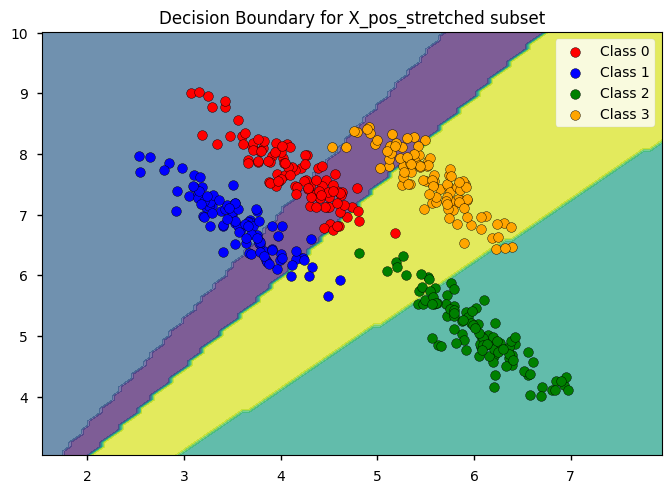

In [1332]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_pos_stretched[:, 0][y_true == 0], X_pos_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_pos_stretched[:, 0][y_true == 1], X_pos_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_pos_stretched[:, 0][y_true == 2], X_pos_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_pos_stretched[:, 0][y_true == 3], X_pos_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_pos_stretched subset")
plt.show()

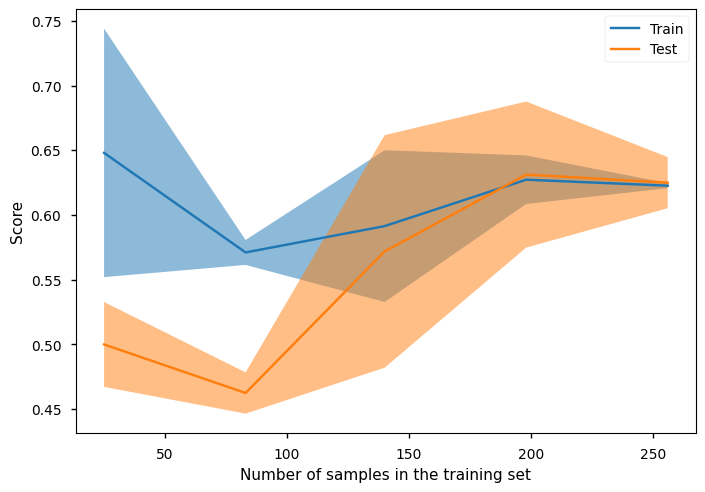

In [1333]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_pos_stretched, train_labels_pos_stretched)
plt.show()

### Набір даних (б)

In [1334]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

Візуалізація даних

In [1335]:
np.unique(Y)

array([False,  True])

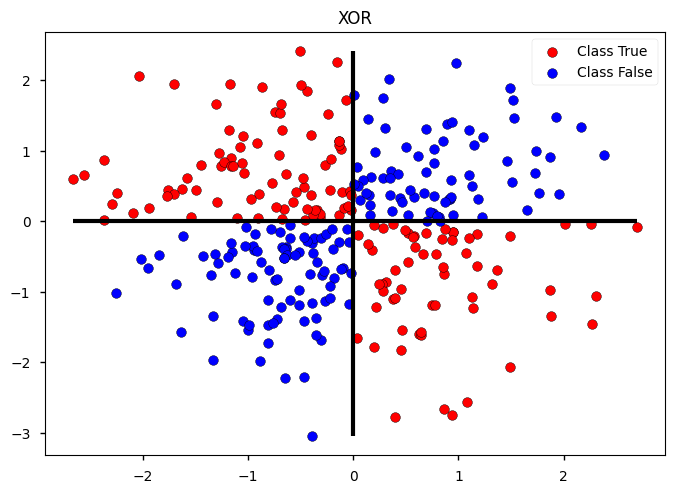

In [1336]:
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.vlines(0, ymin=X[:, 1].min(), ymax=X[:, 1].max(), linewidth=3, colors='black')
plt.hlines(0, xmin=X[:, 0].min(), xmax=X[:, 0].max(), linewidth=3, colors='black')
plt.legend()
plt.title("XOR")
plt.show()

Розбиття даних на навчальний та тестовий набори

In [1337]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, Y, test_size=0.2)

In [1338]:
train_data.shape

(240, 2)

In [1339]:
test_data.shape

(60, 2)

In [1340]:
train_labels.shape

(240,)

In [1341]:
test_labels.shape

(60,)

Побудова моделі 1. Припущення про те що дані в кожному класі мають нормальний розпоіл без коваріації між вимірами

In [1342]:
model = naive_bayes.GaussianNB()
model.fit(train_data, train_labels)
model.predict(test_data)

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [1343]:
test_labels

array([ True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True,  True])

In [1344]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 33 прикладів з 60


Апостеріорні імовірності:

In [1345]:
model.predict_proba(test_data)

array([[0.57765033, 0.42234967],
       [0.43614082, 0.56385918],
       [0.56300217, 0.43699783],
       [0.59893612, 0.40106388],
       [0.56694016, 0.43305984],
       [0.59875736, 0.40124264],
       [0.54049563, 0.45950437],
       [0.45911708, 0.54088292],
       [0.57676976, 0.42323024],
       [0.5728912 , 0.4271088 ],
       [0.58019667, 0.41980333],
       [0.5893584 , 0.4106416 ],
       [0.59193636, 0.40806364],
       [0.38060602, 0.61939398],
       [0.6027515 , 0.3972485 ],
       [0.47581829, 0.52418171],
       [0.59448813, 0.40551187],
       [0.58363347, 0.41636653],
       [0.59149988, 0.40850012],
       [0.55527833, 0.44472167],
       [0.58216592, 0.41783408],
       [0.56036853, 0.43963147],
       [0.60432891, 0.39567109],
       [0.42011038, 0.57988962],
       [0.5739068 , 0.4260932 ],
       [0.5974298 , 0.4025702 ],
       [0.59853678, 0.40146322],
       [0.55927988, 0.44072012],
       [0.58139344, 0.41860656],
       [0.57382061, 0.42617939],
       [0.

Границі рішень:

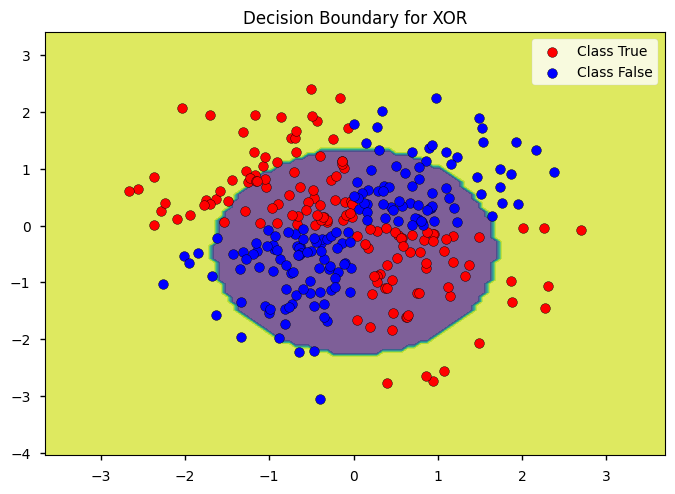

In [1346]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR")
plt.show()

Розрахунок критеріїв якості:

In [1347]:
metrics.confusion_matrix(test_labels, model.predict(test_data))

array([[26,  5],
       [22,  7]])

In [1348]:
metrics.precision_score(test_labels, model.predict(test_data))

0.5833333333333334

In [1349]:
metrics.recall_score(test_labels, model.predict(test_data))

0.2413793103448276

In [1350]:
metrics.f1_score(test_labels, model.predict(test_data))

0.34146341463414637

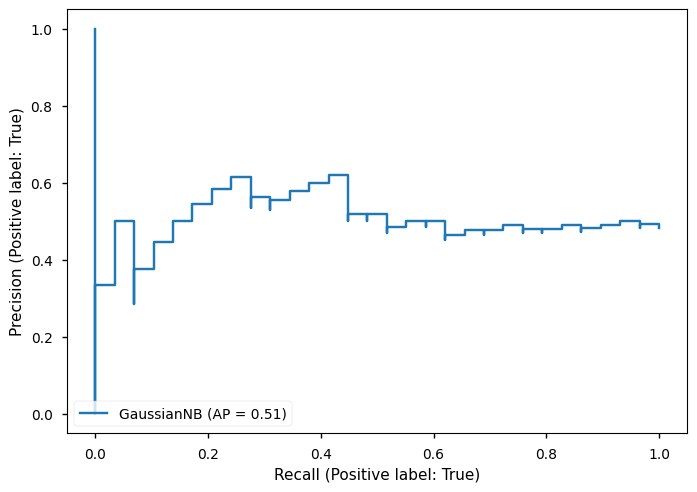

In [1351]:
metrics.PrecisionRecallDisplay.from_estimator(model, test_data, test_labels)
plt.show()

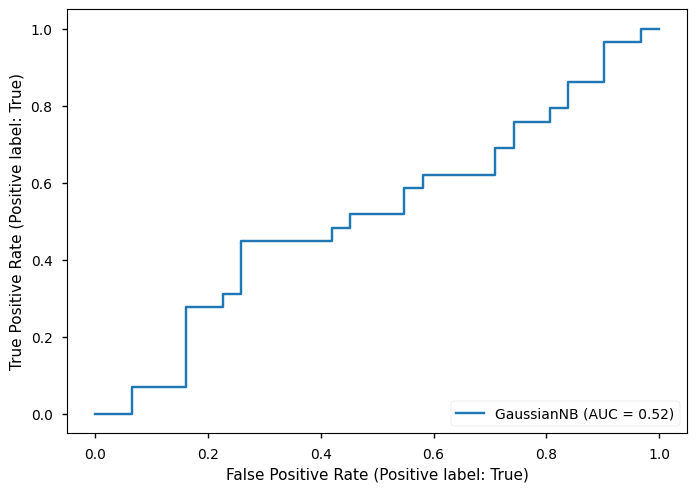

In [1352]:
metrics.RocCurveDisplay.from_estimator(model, test_data, test_labels)
plt.show()

In [1353]:
metrics.roc_auc_score(test_labels, model.predict(test_data))

0.5400444938820913

Решітчастий пошук для підбору гіперпараметрів:

In [1354]:
parameters = {'var_smoothing': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data, train_labels)
grid_search.best_estimator_

GaussianNB(var_smoothing=0.01)

Навчання моделі на підмножині навчальних даних

In [1355]:
model.fit(train_data[:20], train_labels[:20])
model.predict(test_data)

array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False])

In [1356]:
test_labels

array([ True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True,  True])

In [1357]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 30 прикладів з 60


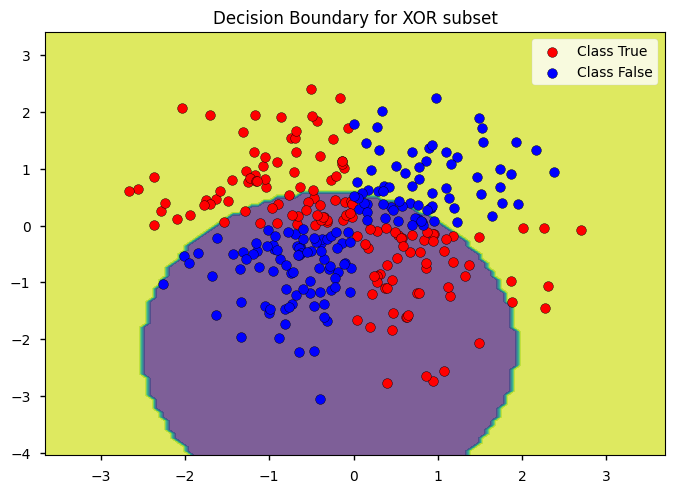

In [1358]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR subset")
plt.show()

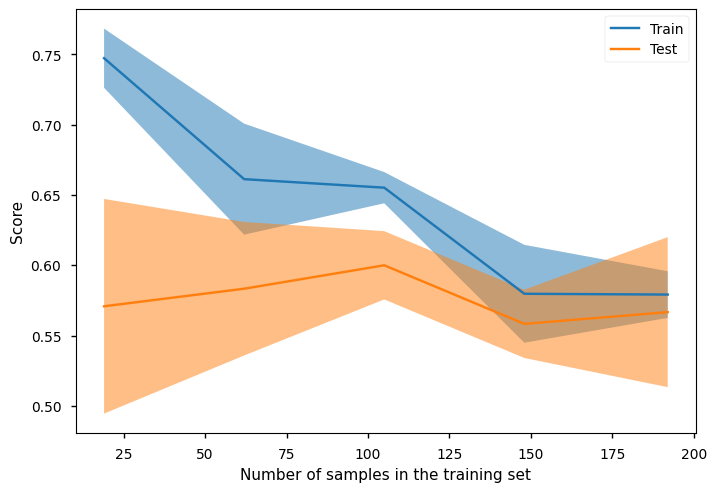

In [1359]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data, train_labels)
plt.show()

Отже, в даному випадку від розміру навчальної множини якість моделі не залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині не є гарною та не вирішує добре поставлену задачу класифікації.

Побудова моделі 2. Припущення про те що дані в кожному класі мають поліноміальний розпоіл

In [1360]:
X_pos = X + 5
train_data_pos, test_data_pos, train_labels_pos, test_labels_pos = model_selection.train_test_split(X_pos, Y, test_size=0.2)

In [1361]:
model = naive_bayes.MultinomialNB()
model.fit(train_data_pos, train_labels_pos)
model.predict(test_data_pos)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [1362]:
test_labels_pos

array([False,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True,  True])

In [1363]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos == model.predict(test_data_pos))} прикладів з {len(test_labels_pos)}')

Правильно класифіковано 30 прикладів з 60


Апостеріорні імовірності:

In [1364]:
model.predict_proba(test_data_pos)

array([[0.52856201, 0.47143799],
       [0.52659859, 0.47340141],
       [0.53890424, 0.46109576],
       [0.52539881, 0.47460119],
       [0.5446195 , 0.4553805 ],
       [0.53118485, 0.46881515],
       [0.51741979, 0.48258021],
       [0.54241103, 0.45758897],
       [0.56240062, 0.43759938],
       [0.51444938, 0.48555062],
       [0.53440749, 0.46559251],
       [0.51386725, 0.48613275],
       [0.53663535, 0.46336465],
       [0.53176657, 0.46823343],
       [0.52717898, 0.47282102],
       [0.52833795, 0.47166205],
       [0.54292617, 0.45707383],
       [0.53247812, 0.46752188],
       [0.53031829, 0.46968171],
       [0.53884308, 0.46115692],
       [0.53641109, 0.46358891],
       [0.52552155, 0.47447845],
       [0.53854941, 0.46145059],
       [0.52123511, 0.47876489],
       [0.53101194, 0.46898806],
       [0.54001206, 0.45998794],
       [0.53136493, 0.46863507],
       [0.54533787, 0.45466213],
       [0.53856052, 0.46143948],
       [0.54074459, 0.45925541],
       [0.

Границі рішень:

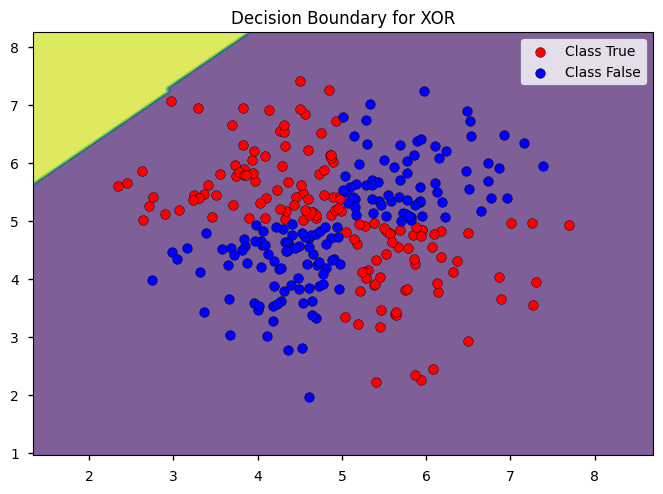

In [1365]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos, response_method='predict', alpha=0.7)
plt.scatter(X_pos[:, 0][Y == True], X_pos[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X_pos[:, 0][Y == False], X_pos[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR")
plt.show()

Розрахунок критеріїв якості:

In [1366]:
metrics.confusion_matrix(test_labels_pos, model.predict(test_data_pos))

array([[30,  0],
       [30,  0]])

In [1367]:
metrics.precision_score(test_labels_pos, model.predict(test_data_pos))

/home/ilyahl/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [1368]:
metrics.recall_score(test_labels_pos, model.predict(test_data_pos))

0.0

In [1369]:
metrics.f1_score(test_labels_pos, model.predict(test_data_pos))

0.0

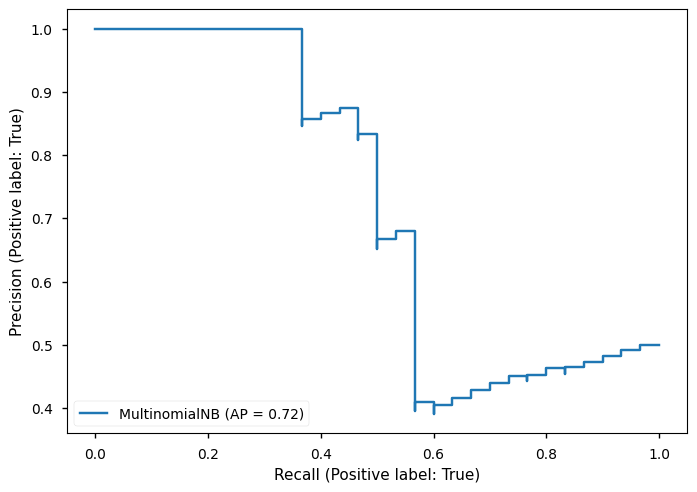

In [1370]:
metrics.PrecisionRecallDisplay.from_estimator(model, test_data_pos, test_labels_pos)
plt.show()

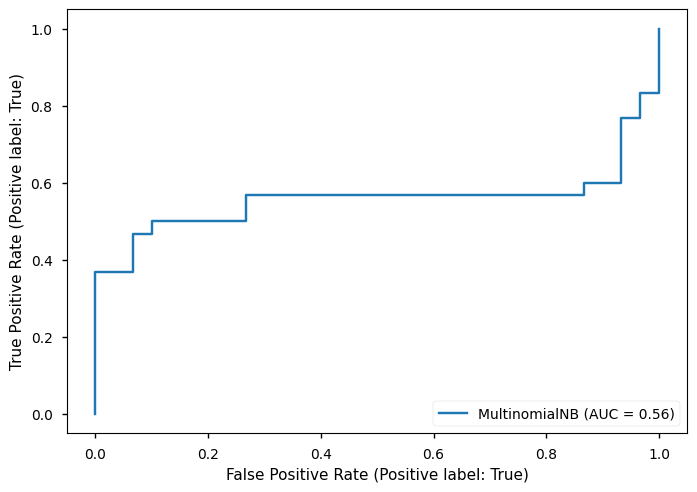

In [1371]:
metrics.RocCurveDisplay.from_estimator(model, test_data_pos, test_labels_pos)
plt.show()

In [1372]:
metrics.roc_auc_score(test_labels_pos, model.predict(test_data_pos))

0.5

Решітчастий пошук для підбору гіперпараметрів:

In [1373]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001)}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_pos, train_labels_pos)
grid_search.best_estimator_

MultinomialNB(alpha=1)

Навчання моделі на підмножині навчальних даних

In [1374]:
model.fit(train_data_pos[:20], train_labels_pos[:20])
model.predict(test_data_pos)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [1375]:
test_labels_pos

array([False,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True,  True])

In [1376]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_pos == model.predict(test_data_pos))} прикладів з {len(test_labels_pos)}')

Правильно класифіковано 30 прикладів з 60


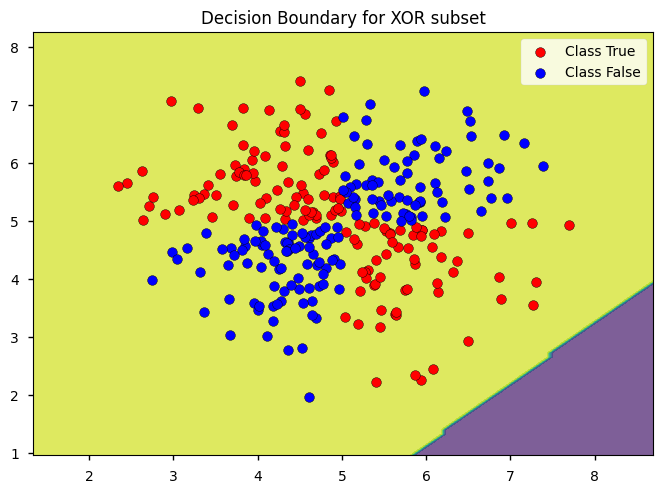

In [1377]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_pos, response_method='predict', alpha=0.7)
plt.scatter(X_pos[:, 0][Y == True], X_pos[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X_pos[:, 0][Y == False], X_pos[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR subset")
plt.show()

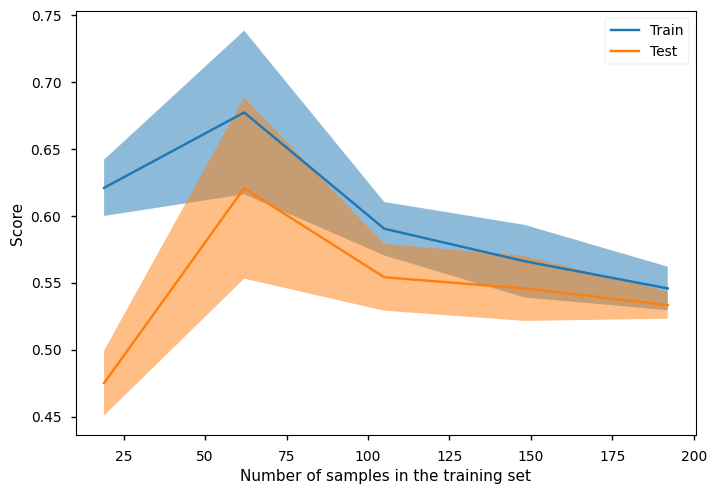

In [1378]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_pos, train_labels_pos)
plt.show()

Отже, в даному випадку від розміру навчальної множини якість моделі не залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині не є гарною та взаглі не вирішує добре поставлену задачу класифікації.